<a href="https://colab.research.google.com/github/Polina2508/Neuron/blob/main/neuronka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-plot

In [2]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

Создаем датафрейм для чтения и анализа данных


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/neu/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/neu/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/drive/MyDrive/neu/val.txt', header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [4]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

Читаем данные обущения и проверки

In [5]:
X=df_train['Input']

In [6]:
l=[]
for i in X:
  l.append(len(i))

In [7]:
len1=pd.DataFrame(l)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


Исправляем длину ввода встраиваемых слоев

In [8]:
c=[]
for i in range(7,301):
   ct=0
   for k in l:
     if k==i:
       ct+=1
   c.append(ct)

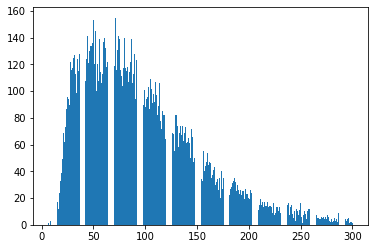

In [9]:
plt.bar(range(7,301),c)
plt.show()

Преобразовываем предложения в векторы слов

In [10]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [11]:
len(tokenizer.word_index)

15213

In [12]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [13]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [14]:
Y_train=df_train['Sentiment'].values

one hot encoding. преобразовывем данные в матрицу

In [15]:
Y_train_f=to_categorical(Y_train)

In [16]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [18]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [19]:
Y_val_f=to_categorical(Y_val)

In [20]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout

Создаем модель нейронки

In [22]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            973568    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


Запускаем модель

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 197s 384ms/step - loss: 1.4632 - accuracy: 0.4099 - val_loss: 0.7161 - val_accuracy: 0.7300
Epoch 2/12
500/500 [==============================] - 191s 383ms/step - loss: 0.5743 - accuracy: 0.7784 - val_loss: 0.3444 - val_accuracy: 0.8770
Epoch 3/12
500/500 [==============================] - 193s 385ms/step - loss: 0.3162 - accuracy: 0.8908 - val_loss: 0.2278 - val_accuracy: 0.9175
Epoch 4/12
500/500 [==============================] - 192s 383ms/step - loss: 0.2223 - accuracy: 0.9230 - val_loss: 0.2310 - val_accuracy: 0.9200
Epoch 5/12
500/500 [==============================] - 192s 385ms/step - loss: 0.1777 - accuracy: 0.9379 - val_loss: 0.1959 - val_accuracy: 0.9345
Epoch 6/12
500/500 [==============================] - 192s 384ms/step - loss: 0.1373 - accuracy: 0.9491 - val_loss: 0.2050 - val_accuracy: 0.9260
Epoch 7/12
500/500 [==============================] - 191s 383ms/step - loss: 0.1217 - accuracy: 0.9534 - val_loss: 0.1945 -

Строим графики потерь и точности

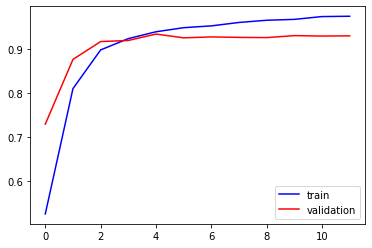

In [25]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

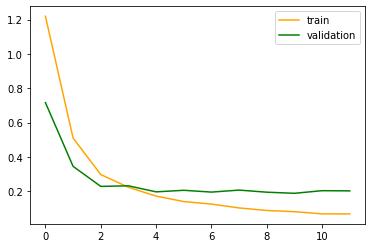

In [26]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

Проверка тестовых данных

In [27]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [28]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [29]:
Y_test_f=to_categorical(Y_test)

In [30]:
X_test_pad.shape

(2000, 80)

In [31]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

Точность тестовых данных

In [32]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 7s 112ms/step - loss: 0.1937 - accuracy: 0.9255


[0.19372963905334473, 0.9254999756813049]

Построение матрицы путаницы(хз нужно ли)

In [33]:
Y_pred=np.argmax(model.predict(X_test_pad), axis=-1)


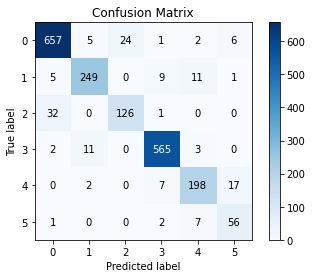

In [34]:
plot_confusion_matrix(Y_test,Y_pred)

In [35]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       695
           1       0.93      0.91      0.92       275
           2       0.84      0.79      0.82       159
           3       0.97      0.97      0.97       581
           4       0.90      0.88      0.89       224
           5       0.70      0.85      0.77        66

    accuracy                           0.93      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.93      0.93      0.93      2000



Финалочка

In [43]:
def get_key(value):
    dictionary={'😋':0,'😡':1,'😍':2,'😪':3,'😰':4,'🤪':5}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [44]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(np.argmax(sentence_padded))
  print(sentence,ans)

In [45]:
predict(str(input('Enter a massage : ')))

Enter a massage : sex
sex 😋


In [ ]:
predict(str(input('Enter a massage : ')))


Enter a massage : i feel inspired
i feel inspired 😍
